<a href="https://colab.research.google.com/github/karabash/.NEtFinalExam/blob/master/Hand_in_Laboration3_part1_vt21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboration 3 part 1 Regression

In this part of laboratory 3 you will perform some different types of regression analysis on a dataset with weather data. Feel free to watch the lecture videos for lecture 6 that goes through regression (part 2 and 4 are most important). 

In the laboratory, only questions that have a **Q** in front should be answered (You may have to do some coding to be able to answer the question in some cases while in others there is only theoretical questions.). 


Tasks that are not questions but only coding are marked with **C**, these are also mandatory.

Example:

**Q** How many men and women have answered the survey? (Here it is preferable to do some coding to easily find the answer.)

**C** Encode a function that calculates the 20 most common words in your data set.

*When we correct the laboration we will not look specifically on how you did your coding to answer questions, but look at whether the answer is correct or not when it comes to questions marked with **Q** .*

**This part of the laboration will be corrected by Soraya (and Elin) and therefore you need to write your answers in English!**

**You are expected to add code blocks or text (markdown) blocks when needed. Make sure to use enough cells to make you code easy to read i.e. try to only make one thing in each cell.**

An initial import of a few of the required libraries is already coded, below. When you need other libraries you can add them in this cell or in the cell where you need them further in the lab. 

In [1]:
from google.colab import drive
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_prefix = "{}/mnist/".format(google_drive_prefix)
except ModuleNotFoundError: 
    data_prefix = "data/"
drive.mount('/content/drive')

Mounted at /content/drive/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/lab3')
!pwd

/content/drive/MyDrive/lab3


In [3]:
# Import Pandas Library, used for data manipulation
# Import matplotlib, used to plot our data
# Import nump for mathemtical operations

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import product
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D


# Suppressing all warnings
#import warnings
#warnings.filterwarnings("ignore")

#import matplotlib

#setup matplotlib
#matplotlib.rc('figure', figsize = (20, 8))
#matplotlib.rc('font', size = 14)
#matplotlib.rc('axes.spines', top = False, right = False)
#matplotlib.rc('axes', grid = False)
#matplotlib.rc('axes', facecolor = 'white')

#setup pandas
pd.options.display.max_rows = 50
pd.set_option('display.max_colwidth', -1)

#import text analysing stuff.
# not needed here...

# maybe?
#pip install nltk

#import nltk as tm
#from nltk.corpus import stopwords
#import wordcloud
#import matplotlib
#from sklearn.feature_extraction.text import CountVectorizer
# Sätt upp visualiseringen
#%matplotlib inline
#matplotlib.pyplot.rcParams['figure.figsize'] = [10, 6]

#to download stopwords 
#tm.download('stopwords')

#stopWords = set(stopwords.words('swedish'))
#stopWords

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [4]:
# Reused From last assignement and made functions
# 
# Honi soit qui mal y pense

# Just made a codeblock from previous assignements and some other python stuff implemented them as functions 
# for fast analysis and so on to just make it easy to paste in the new assignements and run as is.   


#################################
#
# Numeric stuff
#
#################################

# Plot outliers...
def plot_outlier(feature):
  plt.figure(figsize=(25, 6))
  ax = sns.boxplot(x=feature, linewidth=2.5)

# https://en.wikipedia.org/wiki/Interquartile_range
def get_outlier_ranges(feature_column):
    #sorted(feature_column)
    q1,q3 = np.percentile(feature_column, [25,75])
    print(feature_column)
    iqr = q3 - q1
    return (q1-(1.5*iqr)), (q3+(1.5*iqr))

# C:\Users\gazel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. 
# Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
def plot_dist(df, independent_features):
  plt.figure(figsize=(25, 20))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 3, loc+1)
    sns.distplot(df[feature]) # you can try histplot as well
  return None
#################################################################
# one function     testRelPrel()
#################################################################

#cunts maximum values displays differances
def get_relation(df, col1, col2):        
    first_max = df[[col1, col2]].groupby(col1).count().max()[0]
    print(first_max)
    second_max = df[[col1, col2]].groupby(col2).count().max()[0]
    print(second_max)
    if first_max==1:
        if second_max==1:
            return 'one-to-one'
        else:
            return 'one-to-many'
    else:
        if second_max==1:
            return 'many-to-one'
        else:
            return 'many-to-many'

def testRelPrel(df):
    for col_i, col_j in product(df.columns, df.columns):
        if col_i == col_j:
            continue
        print(col_i, col_j, get_relation(df, col_i, col_j))

#get_relation(df, d.Humidity, df.Sunshine)

##################################################################

#####################
#
# to check for categories
#
#######################
def countplot(df,independent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(df[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

# e'g : 
# newFrame=mc_df[['cup_size','fit','quality','category','height']] 
# countplot(newFrame)

############
#
#text tools
#
##############

#Clean emojies
#encode2ascii = lambda x: x.encode('ascii', errors='ignore').decode('utf-8')
#clean_tweets = tweets_corpus.apply(encode2ascii)

#Clean links
#clean_tweets = clean_tweets.str.replace(r'http\S+', '')
#clean_tweets

#docmat = create_term_document_matrix(newdf, min_df=1)
def create_term_document_matrix(corpus, min_df=1):# min_df -> minsta resultat 
    # skapar en column per ord och räknar de samman ställda
    cvec = CountVectorizer(min_df=min_df, stop_words=stopWords)
    tfmatrix = cvec.fit_transform(corpus)
    return pd.DataFrame(data=tfmatrix.toarray(), columns=cvec.get_feature_names())

#top_words = plot_top_words(words, 50, 30)
def plot_top_words(tweets, num_word_instances, top_words):
    tdm_df = create_term_document_matrix(tweets, min_df=2)
    word_frequencies = tdm_df[[x for x in tdm_df.columns if len(x) > 1]].sum()
    sorted_words = word_frequencies.sort_values(ascending=False)
    top_sorted_words = sorted_words[:num_word_instances]
    top_sorted_words[:top_words].plot.bar()
    return top_sorted_words

def showWordCloud(size,wordlist):
    wordcloud = WordCloud(max_font_size=size)
    wordcloud.fit_words(wodlist.to_dict())
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


#other tools 

#sheck list differences
#set(top_words_lowered[0:20].index) - set(top_words_low_no_small_stopwords[0:20].index)

# Setting x and y to the appropriate variables, we reshape x to turn it from a 1D array to a 2D array, ready to be used in our model.
   
###########################
#
# Plot estimated regression 
#
###########################
#TODO can make these three to one
def plotRegPrediction(x_values,y_values,xl,yl):
    x = x_values.to_numpy().reshape(-1,1)
    y = y_values
    # Define the variable lr_model as our linear regression model
    lr_model = LinearRegression()
    # Fit our linear regression model to our data, we are essentially finding θ₀ and θ₁ in our regression line: ŷ = θ₀ + θ₁𝑥 (Y = m + Kx) formula. Gradient descent and other methods are used for this.
    lr_model.fit(x, y)
    # Find predicted values for all x values by applying ŷᵢ = θ₀ + θ₁𝑥ᵢ
    y_pred = lr_model.predict(x)
    plt.scatter(x, y)
    plt.xlabel(xl)
    plt.ylabel(yl)
    # Here we are plotting our regression line ŷ = θ₀ + θ₁𝑥 
    
    # To only plot relation comment out this one 
    plt.plot(x, y_pred)
#normal regression
def testRegplot(model,xtest,ytest,pred,xtit,ytit):
    y_pred_test=model.predict(xtest)
    viz_test = plt
    viz_test.scatter(xtest, ytest, color='red')
    viz_test.plot(xtest, y_pred_test, color='blue')
    #viz_test.title('Salary VS Experience (Test set)')
    viz_test.xlabel(xtit)
    viz_test.ylabel(ytit)
    viz_test.show()

#Beräknar kvalitetsvärden för testsdata
    print("mse " + str(mean_squared_error(ytest,pred)))
    print("rmse " + str(sqrt(mean_squared_error(ytest,pred))))
    print("r^2 score "  + str(r2_score(ytest, pred)))

# plot 3d graph cluster input X[['1','2']], y ,y pred,titlex,titley, titlez
def plot3dthing(x,y,pred,a,b,c):

    x1 = x[['humidity']]
    x2 = x[['wspeedkmh']]

    mlr_model = LinearRegression()
    mlr_model.fit(xtr, y)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x1, x2, y, c='r', marker='o')

# Set axis labels
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    ax.set_zlabel(c)

    print("mse " + str(mean_squared_error(y,pred)))
    print("rmse " + str(sqrt(mean_squared_error(y,pred))))
    print("r^2 score "  + str(r2_score(y, pred)))
    

#################################################################    
# Prediction learning
#################################################################

#TODO change to one function to take care of both multiple and simple learn 
#to next assignement
def regression_predict(datax, datay):
    #
    x_ml = datax.to_numpy().reshape(-1,1)
    y_ml = datay
    
    #Split the dataset in train and test
    x_train, x_test, y_train, y_test = train_test_split(x_ml, y_ml, test_size=0.2, random_state=42)
    
    lm_model = LinearRegression(fit_intercept=True)
    lm_model.fit(x_train, y_train)

    y_pred_train = lm_model.predict(x_train)
    y_pred_test = lm_model.predict(x_test)

    theta_0 = lm_model.intercept_
    theta_1 = lm_model.coef_
    theta_0, theta_1
    
    return lm_model,x_train, x_test, y_train, y_test,y_pred_train,y_pred_test, theta_0, theta_1

#a funktion for multiple learning 
def mutipleRegLearn(datax,datay):
    x_ml = datax#.to_numpy().reshape(-1,1)
    y_ml = datay
    
    #Split the dataset in train and test
    x_train, x_test, y_train, y_test = train_test_split(x_ml, y_ml, test_size=0.2, random_state=42)
    
    lm_model = LinearRegression(fit_intercept=True)
    lm_model.fit(x_train, y_train)

    y_pred_train = lm_model.predict(x_train)
    y_pred_test = lm_model.predict(x_test)

    theta_0 = lm_model.intercept_
    theta_1 = lm_model.coef_
    theta_0, theta_1
    
    return lm_model,x_train, x_test, y_train, y_test,y_pred_train,y_pred_test, theta_0, theta_1




## Data

Start by: 
**C** Importing our dataset and store it in a suitable format with the name `weather_data`. 

In [5]:
# Import our WeatherData and store it in the variable weather_data 
weather_data = pd.read_csv('WeatherData_lab3.csv',delimiter=';')
# Display the data in the notebook
weather_data.head()

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity,Sunshine,Cloud,RainToday,Visibility (km)
0,9.472222,14.1197,1015.13,0.89,NaN,8.0,No,15.8263
1,9.355556,14.2646,1015.63,0.86,NaN,NaN,No,15.8263
2,9.377778,3.9284,1015.94,0.89,NaN,NaN,No,14.9569
3,8.288889,14.1036,1016.41,0.83,NaN,NaN,No,15.8263
4,8.755556,11.0446,1016.51,0.83,NaN,7.0,No,15.8263


In [ ]:
weather_data['Wind Speed (km/h)'].max()

28.3682

## Exploratory analysis
 

**Q** What type of data is in the dataset? (HINT! dtype and type of variable: categorial/continous) 

Everything seams to be float. Which makes things easy exept rain today which could be changed to boolean.

**Q** How many rows and columns, number of datapoints?

(50 rows * 8 columns) - 90NaN = 310... 

**Q** How do you interpret the different columns, write a short sentence that describes each column.

Overall the data seams to be one specific time one day or an average of a day week or mounth when there is no static timestamp. But only because of the RainToday column, one can make the assumption that it is an average of one day per row. 

Temperature - In celsius. float 

WindSpeed - In an odd pice of mesurement unit km/h normally the SI for velocity (v) is m/s. I guess it is not needed for this small values and maximum vindspeed of 8m/s. float

Preassure - In millibars normal preassure, sunny with no wind is around 1012mb. float

Humidity - Or moisturelevel in the air is usually in precentage. float displayed as *100 percentage.

Sunshine - See clouds

Clouds - Is the only one one feel a bit uncomftorble with because of all the nonconsistancy and NaN values. 
All the NaN values we interpret as sunny so : The Sunshine column should probably be dropped totaly because of all the NaN. 

RainToday - A boolean data set not sure yet how to trust.

Visibility - In km but there seams to be alot of inconsistancies 

**C** Rename columns that have unsuitable names for the columns or if the columns have names that are difficult to interpret. (IF everything looks good, you don't need to do anything here) 

**C** Code suitable visualisations that show the relationship between the different variables in the dataset (in two dimensions). Include labels on x and y axis and display a legend for the visualisation(s). You can choose if you want to visualise each relationship in its own plot or if you want to plot all relationships in one visualisation, if you choose the latter, you need to make it possible to distinguish between the different variables.

First there is no outliers.

And second checking all data distribution function from last lab:

Categorial: Can only identify mostly float and integers.

There is no real categorial data on this dataset to videly diversified.

second check all int and float diversified.

We check all maximum counted different values against each other to just sese the diversity better and the only column that is totaly diversified.



**Q** What kinds of relationship can you see between the different variables? 

temperature seams not to be specificly deep bit A/D translation max |50C > -50C| -> 100C  per bit it seams to be something divided by 0.3 max min.

pressure above 1012mb oftem means sunshine and nice weather so all those NaN values in clouds could Become 0 for real
one could also assume that it is cloudy no-8 when raining always.

I'm not sure if the rain function works properly to trust or drop...
There is usually higher humidity when it is raining and a bit lower preassure then 1012.
and it is not getting more humudity when raining. so it makes no sense.

In [ ]:
#Quick Data info 

In [ ]:
weather_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       50 non-null     float64
 1   Wind Speed (km/h)     50 non-null     float64
 2   Pressure (millibars)  50 non-null     float64
 3   Humidity              50 non-null     float64
 4   Sunshine              0 non-null      float64
 5   Cloud                 11 non-null     float64
 6   RainToday             49 non-null     object 
 7   Visibility (km)       50 non-null     float64
dtypes: float64(7), object(1)
memory usage: 3.2+ KB


In [ ]:
(weather_data.nunique(dropna=True))

Temperature (C)         46
Wind Speed (km/h)       48
Pressure (millibars)    50
Humidity                34
Sunshine                0 
Cloud                   5 
RainToday               2 
Visibility (km)         10
dtype: int64

In [ ]:
null_counts = weather_data.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) 

Sunshine     50
Cloud        39
RainToday    1 
dtype: int64

In [ ]:
# Change name... faster to write in code.... 
wd_df = weather_data

In [ ]:
wd_df=wd_df.rename(columns={"Temperature (C)":"tempC",
                            "Wind Speed (km/h)":"wspeedkmh",
                            "Pressure (millibars)":"pressmb",
                            "RainToday":"rain",
                            "Humidity":"humidity",
                            "Visibility (km)":"visikm"})
wd_df

,tempC,wspeedkmh,pressmb,humidity,Sunshine,Cloud,rain,visikm
0,9.472222,14.1197,1015.13,0.89,NaN,8.0,No,15.8263
1,9.355556,14.2646,1015.63,0.86,NaN,NaN,No,15.8263
2,9.377778,3.9284,1015.94,0.89,NaN,NaN,No,14.9569
3,8.288889,14.1036,1016.41,0.83,NaN,NaN,No,15.8263
4,8.755556,11.0446,1016.51,0.83,NaN,7.0,No,15.8263
5,9.222222,13.9587,1016.66,0.85,NaN,NaN,No,14.9569
6,7.733333,12.3648,1016.72,0.95,NaN,1.0,No,9.9820
7,8.772222,14.1519,1016.84,0.89,NaN,NaN,No,9.9820
8,10.822222,11.3183,1017.37,0.82,NaN,NaN,No,9.9820
9,13.772222,12.5258,1017.22,0.72,NaN,NaN,Yes,9.9820


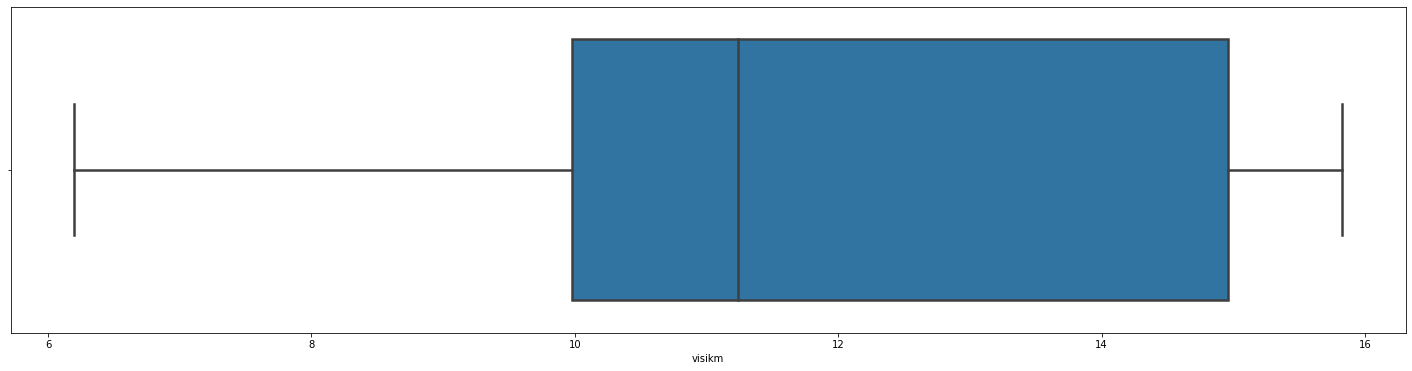

In [ ]:
plot_outlier(wd_df['visikm'])

C:\Users\gazel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gazel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gazel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

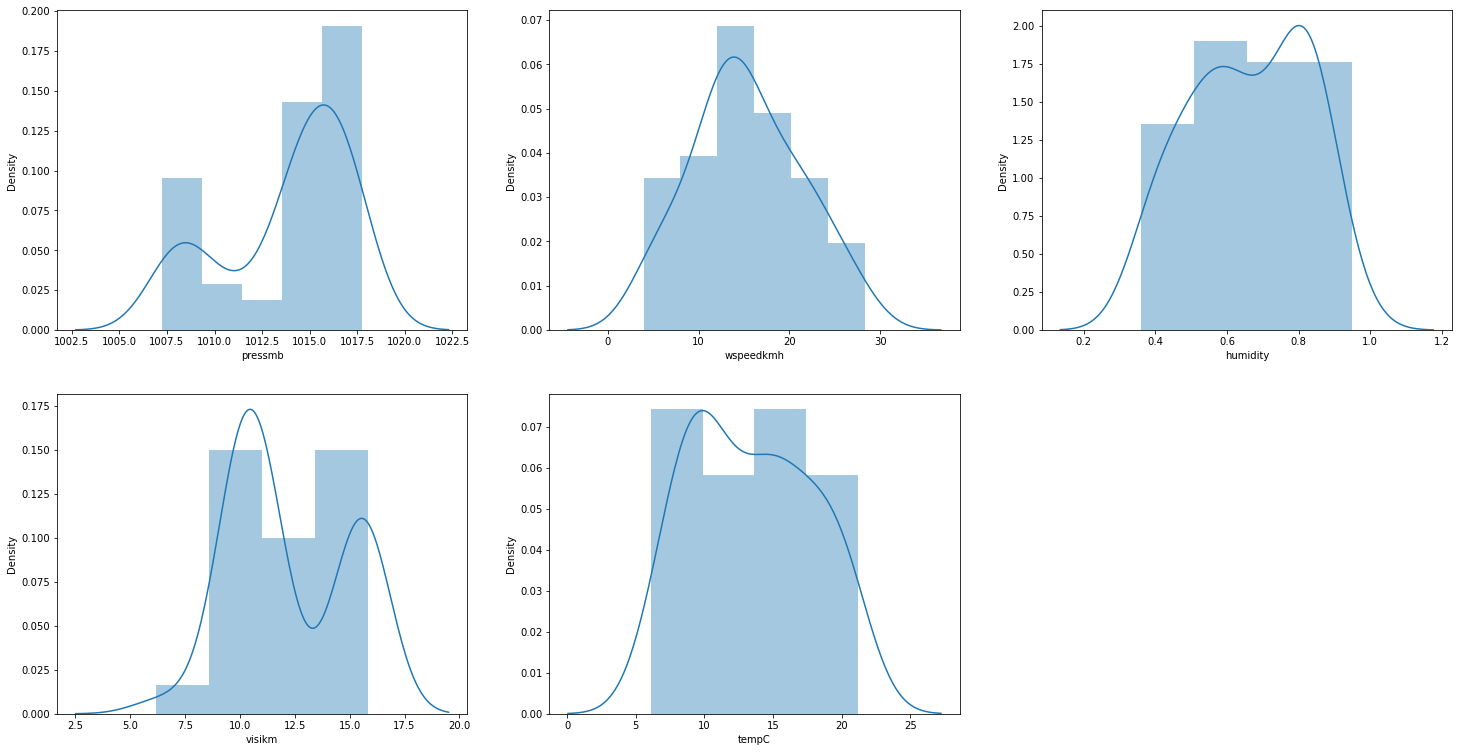

In [ ]:
plot_dist(wd_df, {"tempC","wspeedkmh","pressmb","visikm","humidity"})
# seams nicely normalised...

C:\Users\gazel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gazel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gazel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gazel\anaconda3\lib\si

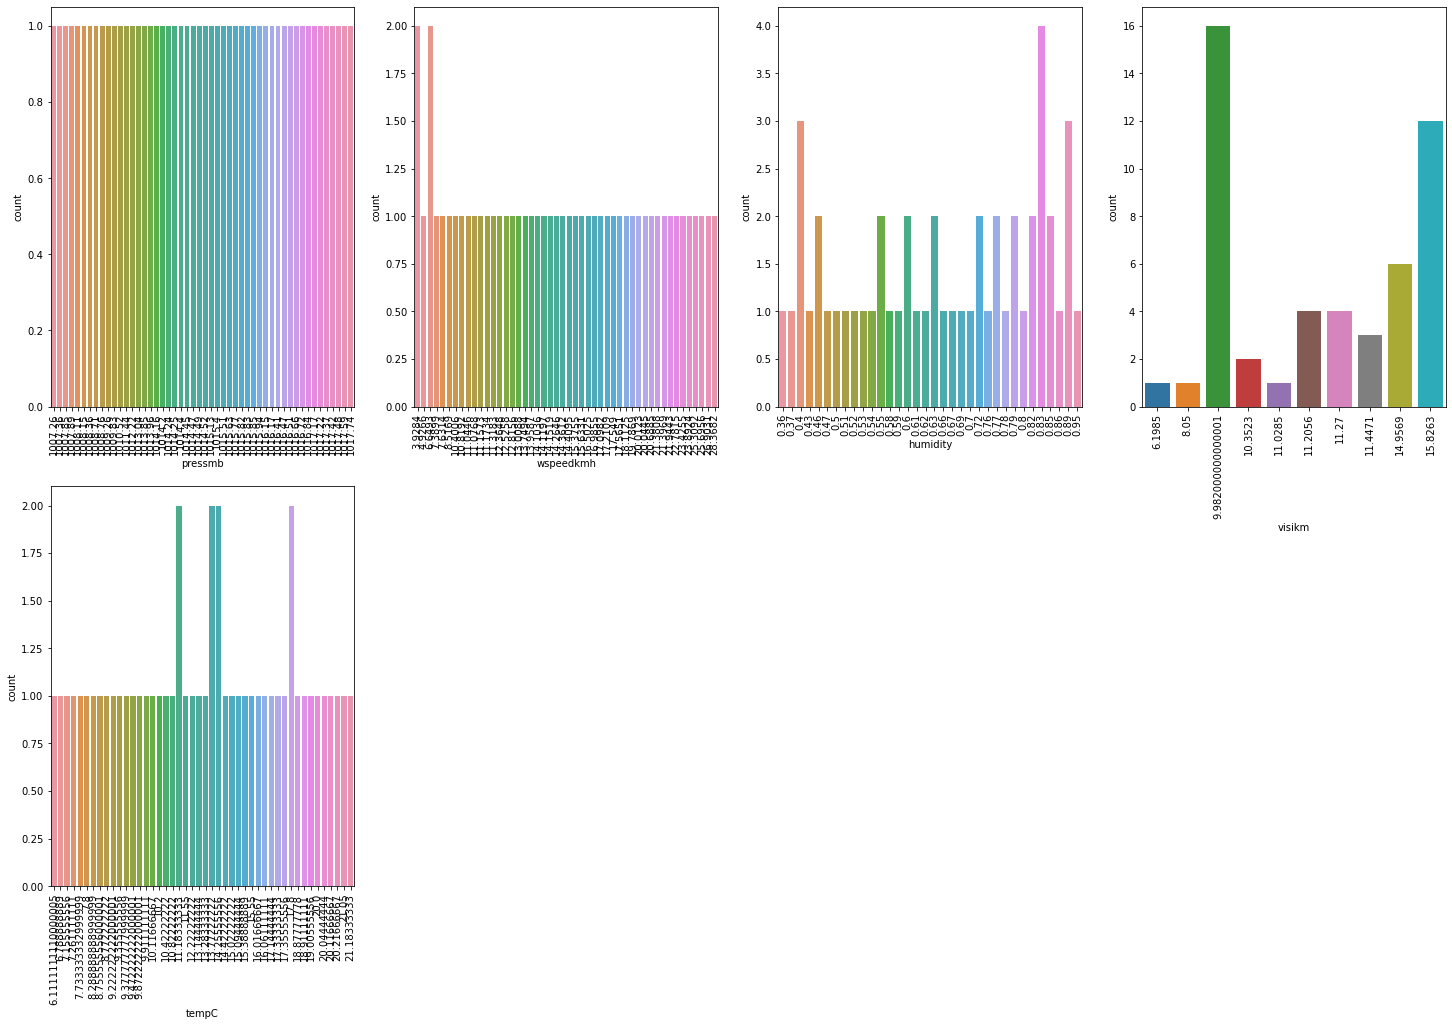

In [ ]:
countplot(wd_df,{"tempC","wspeedkmh","pressmb","visikm","humidity"})
# too many different values to be able to convert to category

In [ ]:
testRelPrel(wd_df)
#Code Checks sum of maximum values against eachother. 

tempC wspeedkmh many-to-many
tempC pressmb many-to-one
tempC humidity many-to-many
tempC Sunshine many-to-many
tempC Cloud one-to-many
tempC rain many-to-many
tempC visikm many-to-many
wspeedkmh tempC many-to-many
wspeedkmh pressmb many-to-one
wspeedkmh humidity many-to-many
wspeedkmh Sunshine many-to-many
wspeedkmh Cloud many-to-many
wspeedkmh rain many-to-many
wspeedkmh visikm many-to-many
pressmb tempC one-to-many
pressmb wspeedkmh one-to-many
pressmb humidity one-to-many
pressmb Sunshine many-to-many
pressmb Cloud one-to-many
pressmb rain one-to-many
pressmb visikm one-to-many
humidity tempC many-to-many
humidity wspeedkmh many-to-many
humidity pressmb many-to-one
humidity Sunshine many-to-many
humidity Cloud many-to-many
humidity rain many-to-many
humidity visikm many-to-many
Sunshine tempC many-to-many
Sunshine wspeedkmh many-to-many
Sunshine pressmb many-to-many
Sunshine humidity many-to-many
Sunshine Cloud many-to-many
Sunshine rain many-to-many
Sunshine visikm many-to-many
Clo

## Data cleaning and feature engineering

**Q** Are there any missing values? If yes, what is your interpretation of the reason(s) and what type of missing values? (HINT! MCAR;MAR;NMAR)

Sunshine can totally get dropped, no values what so ever. And it is redundant though : IF clouds == 0; THEN sunshine = TRUE;

Clouds Could either kindof get restored if broken from temp, press and humidity... like a RAID5 or 6 parity byte restore  
less wind... warm(a few days in row) + humidity(decreasing) = sunny

rain = often cloudy.... if works

We think we will drop it for now...



**C** Handle any missing values in a suitable way (if there are none, you don't need to do anything here). Make sure you changes are saved in your dataframe.

**Q** Are there any variables that need further cleaning/feature engineering such as changing dtype/calculations to improve categorial features etc? 

Changed the rain to a "weird" bool of either 0 or 1. And -1 for NaN makes it easy to sort that particular row out, in case of need. 
I am not so sure about if there is a needed to do it this 

**Q** IS there a need fo standardization/normalization or scaling of variables? Why/why not? (Motivate for each of them)

Not sure the mening by the term scaling but the mantissa of humidity to display it correctly it should be : $$Humidity = h \times 10^{2}$$ 
but if we change it here we divide it later if we s´need to use it for calculations. So it is easier to just 

**C** If yes on any of the above, fix this column and make sure to make the changes on your existing dataframe.



In [ ]:
wd_df = wd_df.drop(['Sunshine'], axis=1)
wd_df = wd_df.drop(['Cloud'], axis=1)

In [ ]:
def convert_rain(data):
    if data == 'Yes':
        return 1
    elif data == 'No':
        return 0
    else:
        return -1

In [ ]:
wd_df['rainnum'] = wd_df.rain.apply(convert_rain).astype('int')
wd_df = wd_df.drop(['rain'], axis=1)
wd_df


,tempC,wspeedkmh,pressmb,humidity,visikm,rainnum
0,9.472222,14.1197,1015.13,0.89,15.8263,0
1,9.355556,14.2646,1015.63,0.86,15.8263,0
2,9.377778,3.9284,1015.94,0.89,14.9569,0
3,8.288889,14.1036,1016.41,0.83,15.8263,0
4,8.755556,11.0446,1016.51,0.83,15.8263,0
5,9.222222,13.9587,1016.66,0.85,14.9569,0
6,7.733333,12.3648,1016.72,0.95,9.9820,0
7,8.772222,14.1519,1016.84,0.89,9.9820,0
8,10.822222,11.3183,1017.37,0.82,9.9820,0
9,13.772222,12.5258,1017.22,0.72,9.9820,1


In [ ]:
null_counts = wd_df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) 

Series([], dtype: int64)

## Linear Regression

### Your first task in regards to modeling is to do a simple linear regression, using only two of the variables present in the dataset.

To help you further the codeblock below show a heatmap of the correlation between the different varaibles. Also, another codeblock show a pairplot that visualize the relationsship between pairwise variables, it is coded using the seaborn library.



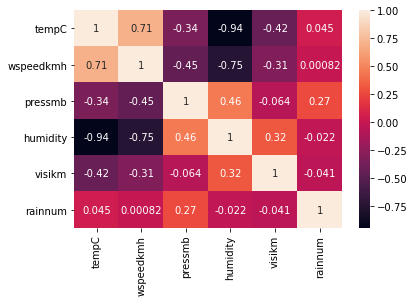

In [ ]:
#seaborn heatmap
corrMatrix = wd_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

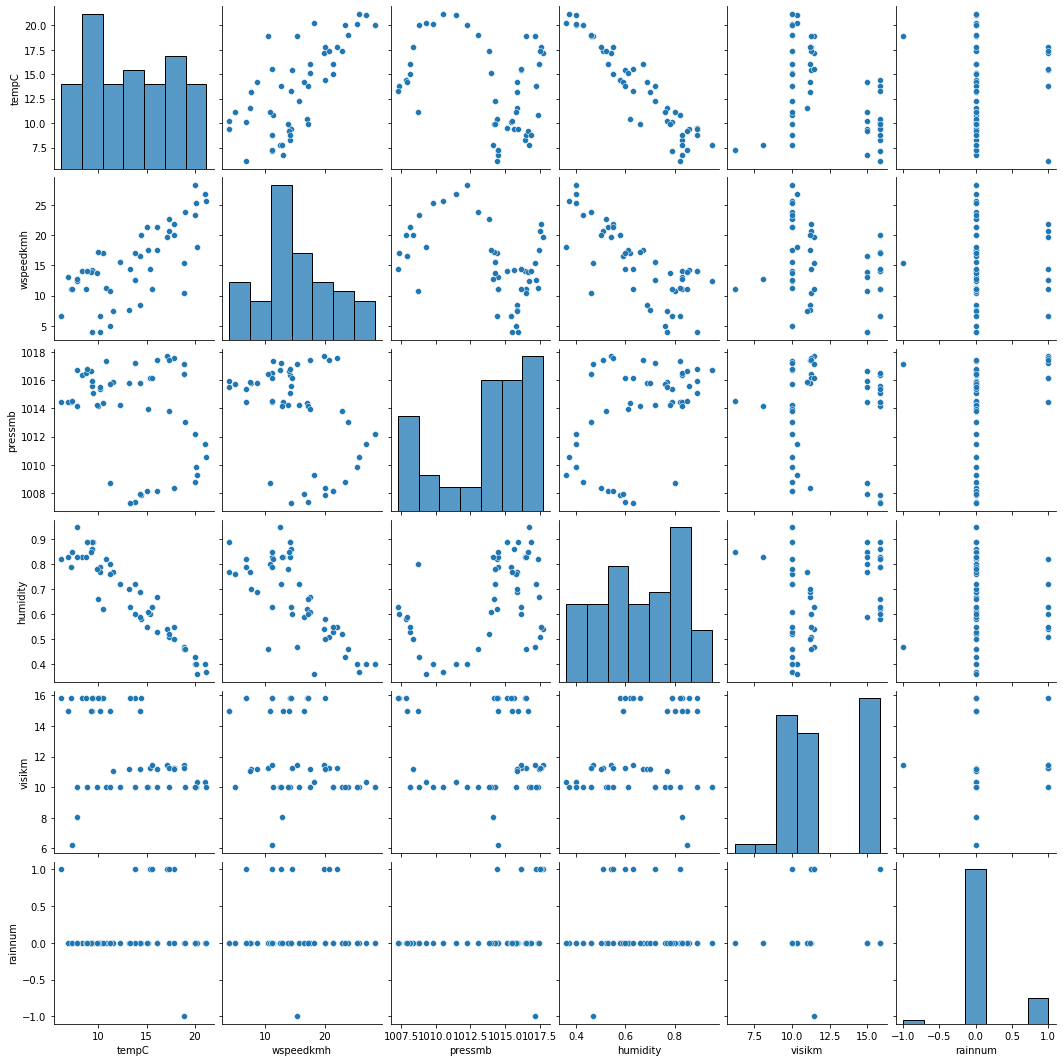

In [ ]:
#seaborn pairplot
colors = {0:"#4CA9FF",1:"FF4343",2:"2FFE64"}
sns.pairplot(wd_df,palette=colors)

In [ ]:
print(wd_df.tempC.max()-wd_df.tempC.min())
print(wd_df.humidity.max()-wd_df.humidity.min())
print(wd_df.wspeedkmh.max()-wd_df.wspeedkmh.min())

15.072222219
0.59
24.4398


**Q** Based on the heat map and your visualisations on relationships, which two variables (one for input (x) and another for output (y) would you consider most appropriate for doing a linear regression analysis? 

HINT! THe table below (from [this page](https://www.statology.org/what-is-a-strong-correlation/))helps you interpret the heatmap. **A must in a linear regression model is to have a linear relationship between the variables!**

r in the table below is the Pearson correlation coefficient that pandas calculate for us (Note that it it the absolut value of r, the correclation coefficent can be both negative and positive). Also see [pandas documentation on correlation calculations](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

| Absolute value of r    | Strength of relationship|        
|------------------------|-------------------------|
| r < 0.25               |No relationship          |
| 0.25 < r < 0.5         |Weak relationship        |
| 0.5 < r < 0.75         |Moderate relationship    |
| r > 0.75               |Strong relationship      | 

The first one we whould choose is the tempC and humidity becouse of the heatmap value of -.91 second alternative would probably be to predict from Wspeed that has the correlation of .71 and the scatter plots shows strong linierity on these specific data specimen.

**Q** Which column should represent the independent variable, x, and the dependent variable, y (the one you want to predict). In order to get the best possible prediction of y? 
Motivate your answer

The absolute number of the distance for humidity, tempC and windspeed is : $$MAX(tempC,humidity,wspeedkmh)$$
and : $$MIN(tempC,humidity,wspeedkmh)$$
to get : $$[15.07],[.59],[24.43]$$

**C** Investigate if there are any outliers in the two variables you have chosen, if so, handle them in a suitable way. 
Did this in the cleaning step...

**Q** Why did you choose to handle/not handle the outliers in the two variables?

Did this in the cleaning step. We could not find any outliers that needed handeling.

### Modeling

**C** Assign the correct values to x and y in the codeblock provided below. (NOTE! You should call values().reshape() on x because scikit_learn requires input to be in the form of two dimensional arrays i.e. a numpy array (created by pandas.values() in 2D ()created by numpy.reshape()). Or to be more precise, to have one column and as many rows as necessary. That’s exactly what the argument (-1, 1) of .reshape() specifies. See also [numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) and [scikit_learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)

The code already visible below imports the correct scikit_learn model (LinearRegression) in order to perform the training. Further, code is provided that performs the splitting of data into training and test and also performs the training on the trainingdataset and prediction on both the test and training datasets. 

**Q** What does the last three lines in the codeblock below do?

In [ ]:
#Insert the correct x and y 
x = wd_df.tempC.to_numpy().reshape(-1,1)
y = wd_df['humidity']

#Split into traning and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#train
lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(x_train, y_train)

#Predict (here done on both test and traingset)
y_pred_train = lr_model.predict(x_train)
y_pred_test = lr_model.predict(x_test)

# intercept = where on the y_axis it is starting 
theta_0 = lr_model.intercept_
# coeffisient = The increase or decrease of value ofer x 
theta_1 = lr_model.coef_
#prints the resulting values 
theta_0, theta_1

(1.1424411188585488, array([-0.03557787]))

**C** Create a new dataframe with two columns, one with the actual values in the testset and one with the predicted values on the testset. 

**Q**What is your interpretation of the correctness of your model?

By a first visual inspection of the numbers there seams to be a diference of max 15% but mostly aprox 10% test and predict data. The correlation was between theese .91 so that remaining 9 is probably what is ment in the differance     

In [ ]:
df_compare = pd.DataFrame({'test': y_test, 'pred_test': y_pred_test})
df_compare

,test,pred_test
13,0.51,0.525758
39,0.37,0.388783
30,0.85,0.884106
45,0.55,0.607982
17,0.63,0.589205
48,0.60,0.652455
26,0.80,0.744562
25,0.66,0.789825
32,0.78,0.791208
19,0.70,0.674790


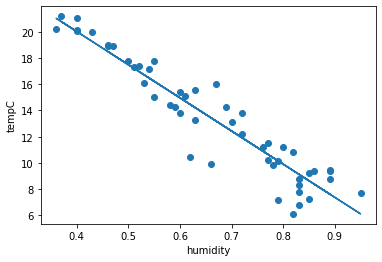

In [ ]:
plotRegPrediction(wd_df['humidity'],wd_df['tempC'],'humidity','tempC')

**C** Code a visualization that show the result (the straight line created by fitting your model to your training data) in relation to the trainingset and another visualization that show the result in relation to the testset. Use one code cell for each coding.

In [ ]:
#plotRegPrediction(df_compare.pred_test,df_compare.test,'pred_test','test')

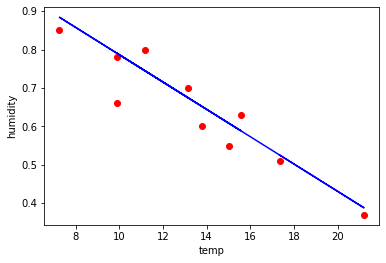

mse 0.003023110903554004
rmse 0.05498282371390182
r^2 score 0.8430775549673499


In [ ]:
testRegplot(lr_model,x_test,y_test,y_pred_test,'temp','humidity')

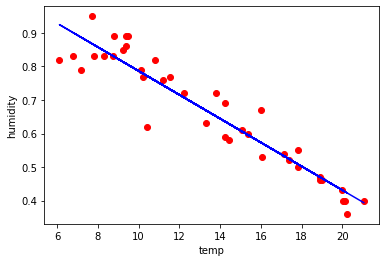

mse 0.0029116814646958167
rmse 0.053959998746254775
r^2 score 0.8970218493639797


In [ ]:
#Code for visualising testdata and trained model
testRegplot(lr_model,x_train,y_train,y_pred_train,'temp','humidity')

**Q** What do the two above visualisation show?

It shows the general direction in how to compare temperature vs humidity
A teperature of about 12 degrees meets the line at around the hight of 73% humidity. 

The scatter seams to tighten up orount the line towards the increesing temperature side.  
It is probably more exact on the higher temperatures and not as exact on the other.

**Q** Why do we still predict using the training data and not the test data when visualising the result on the testset?

There is just a part of data points in there. 20% is what code says it is.

**Q** What is the preformance measures of your model? Calculate MSE, R^2 and MRSE on both test and trainingdata using skikit_learn and interpret the result.

See scikit_learn library: [MSE/MRSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html), #Evaluate on trainingset[r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score)

Evaluate test

All values looks best when i swiched between the x and y values from the originally choosen x and y values   

x/y switched
$$MSE =0.0029116814646958167$$
should be close to 0.0
$$RMSE =0.053959998746254775$$
should be close to 0.0
$$r^2_{score} = 0.8970218493639797$$
should be close to 1.0


compared to x/y original

$$MSE= 2.06341690675484$$
$$RMSE= 1.4364598521207754$$
$$r^2_{score} = 0.8970218493639796$$

A thing to note is that both $r^2_{score}$ are the exact same exept for a python rounding error in the vm.

Evaluate training

for this i am only showing the best of the two tested sets of data.
$$MSE = 0.003023110903554004$$ 
$$RMSE = 0.05498282371390182$$
$$r^2_{score} = 0.8430775549673499$$

In general the testdata is generally lower 

There is something strange about our r2_score, it is higher on the testset compared to the trainingset. This is against what we have learned, that models always perform better on trainingset compared to testset.

**Q** Why might that be? 
The test_size and random_state variables changes the amount of testvalues and what values in the folowing function.  
<code>train_test_split(x, y, test_size=0.2, random_state=42)</code>

The $r^2_{score}$ is different because the line is renerated trom the available data. 

**Q** What can we do to make it better?
Add more data to booth to smooth the static noice out a bit. 

In order to see how or model performs we can also build a distribution plot of the actual values and the predicted values, this is done in the code below. 

**Q** Interpret the curves, what does it tell about the performance of the model?

The predicted values are about .04 higher.
I follows th actual pretty good.

C:\Users\gazel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\gazel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


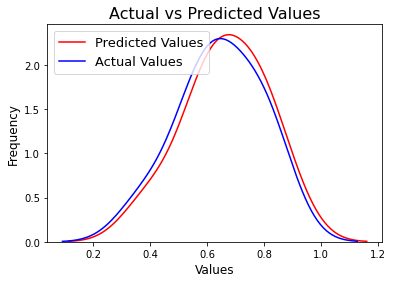

In [ ]:
sns.distplot(y_pred_test, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## Multiple linear regression

### Your next task in regards to modeling is to perform a multiple linear regression in order to predic the same y.

**Q** What varaibles from your dataset are appropriate to add to x to have more variables as input? Why?

The best variable is "wind spd" though against "humidity" it has -0.75 as value on the heatmap and against "tempC" it has the value 0.71 so the resulting plane will probably be leaning in a fashinating way.

**C** Perform a multiple linear regression in a similar fashion as you did while performing the simple linear regression, start by assigning appropriate columns to X and y (y should be the same as in the simple linear regression).

*It is preferable to use other names for your variables so as not to create confusion or overwrite variables by misstake.*

**C** Evaluate your model using the same measurements as for the simple linear regression.

.0013 increase in the $r^2_{score}$and this means cloaser to the optimal 1. Since mse and rmse is suppose to be close to 0 it mad things worse.  

**C** Create a visualization that show the difference between real values and predicted values on testdata (see simple linear regression visualization).

**Q** Why is it difficult to create a visualization that show the result on training and testdata, similar to the ones we did in the simple linear regression above?

It is 3d for real, so it is like a universe and you need 3 points x, y and z to know the truth. A plane, a three dimentional line however, would just still show two axis. but a fat cylinder suronding the scatter in the right angle would make us loose detailed intormation about the plot itself.    

**Q** How do the models differ? Which one is better than the other? Why?

2 dim is is easier to se approx wher the data meets and i could probably do that two times instead of this 3d plot.

*To answer the questions and do the required coding, please use one codeblock per question to facilitate the checking of your assignment.*

mse 2.0360114741625406
rmse 1.4268887392374152
r^2 score 0.8983895617038836
[28.87534723]
[[  0.03968083 -24.15093255]]


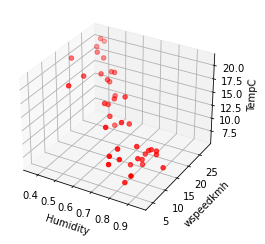

In [ ]:
a = 'tempC'
b = 'humidity'
m1,xtr, xtt, ytr, ytt,yptr,yptt, th01, th11 = mutipleRegLearn(wd_df[['wspeedkmh','humidity']],wd_df[['tempC']])
plot3dthing(xtr,ytr,yptr,'Humidity','wspeedkmh','TempC')
print(th01)
print(th11)

In [ ]:
#Visualize the difference between real values and predicted values on testdata


In [ ]:
#Evaluate